## Proyecto Sprint 9

### Introducción 

En este proyecto se va a realizar un análisis para la empresa Showz, una empresa de venta de entrada de eventos, donde el objetivo principal es ayudar a optimizar los gastos de marketing. Se cuenta con datos de visitas de usuarios del 2017 al 2018 a la plataforma.

In [1]:
# se importan las librerías a usar 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  

#### 1. Carga y preparación de datos para análisis 

In [2]:
#carga de archivos 
visits = pd.read_csv ('visits_log_us.csv')
orders = pd.read_csv ('orders_log_us.csv')
costs = pd.read_csv ('costs_us.csv')

##### Visits 

In [3]:
#visualización inicial de los archivos 
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


- No se tienen valores nulos, se transforma End Ts y Start Ts a formato datetime 

In [5]:
#transformación de fechas a formatos datetime 
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime (visits['End Ts'])

In [6]:
#se verifica el carmbio 
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [7]:
#se verifica que no hayan valores duplicados 
visits.duplicated().sum()

np.int64(0)

- Se verifica que no se tienen registros duplicados 

In [8]:
#distribución general
visits.describe()

,End Ts,Source Id,Start Ts,Uid
count,359400,359400.000000,359400,3.594000e+05
mean,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19
std,NaN,1.917116,NaN,5.298433e+18


##### Orders 

In [9]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


- Se verifica que no hay valores nulos, se transforma la fecha de compra a formato datetime 

In [11]:
#se transforma a formato datetime Buy Ts
orders['Buy Ts'] = pd.to_datetime (orders['Buy Ts'])

In [12]:
#se verifica que no hayan filas duplicadas
orders.duplicated().sum()

np.int64(0)

In [13]:
#se verifica los formatos nuevamente 
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [14]:
orders.describe()

,Buy Ts,Revenue,Uid
count,50415,50415.000000,5.041500e+04
mean,2017-12-20 05:14:24.846176768,4.999647,9.098161e+18
min,2017-06-01 00:10:00,0.000000,3.135781e+14
25%,2017-10-13 17:28:00,1.220000,4.533567e+18
50%,2017-12-21 14:12:00,2.500000,9.102274e+18
75%,2018-03-02 16:10:00,4.890000,1.368290e+19
max,2018-06-01 00:02:00,2633.280000,1.844617e+19
std,NaN,21.818359,5.285742e+18


##### Costs

In [15]:
#visualización inicial del df
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


- No hay valores nulos y se transforma la fecha a formato datetime 

In [17]:
#se transforma dt a formato fecha 
costs['dt'] = pd.to_datetime(costs['dt'])

In [18]:
#se verifica el cambio de formato 
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
#se verifica que no haya duplicados 
costs.duplicated().sum()

np.int64(0)

In [20]:
#distribución general
costs.describe()

,source_id,dt,costs
count,2542.000000,2542,2542.000000
mean,4.857199,2017-11-29 09:04:57.403619072,129.477427
min,1.000000,2017-06-01 00:00:00,0.540000
25%,2.000000,2017-08-30 00:00:00,21.945000
50%,4.000000,2017-11-29 00:00:00,77.295000
75%,9.000000,2018-02-28 00:00:00,170.065000
max,10.000000,2018-05-31 00:00:00,1788.280000
std,3.181581,NaN,156.296628


Una vez que se ya se cuenta con los datos limpios y listos para trabajar se pasa a la siguiente sección

#### 2. Cálculo de métricas e informes 

#### 1. Visitas 

1. ¿Cuántas personas lo usan cada día, semana y mes?

In [21]:
#se calcula el DAU, WAU, MAU, se crea columnas para determinar el año, mes, semana y fecha. 
visits['Date'] = visits['Start Ts'].dt.date
visits['Year'] = visits ['Start Ts'].dt.isocalendar().year
visits['Month'] = visits ['Start Ts'].dt.month 
visits['Week'] = visits['Start Ts'].dt.isocalendar().week
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid,Date,Year,Month,Week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017,12,51
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018,2,8
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017,7,26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018,5,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017,12,52
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017,9,35
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,2018,1,5
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312,2017-11-05,2017,11,44
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644,2017-07-19,2017,7,29
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063,2017-11-08,2017,11,45


In [22]:
#se calcula el DAU
dau_total = visits.groupby('Date').agg({'Uid':'nunique'}).mean()
int(dau_total.iloc[0])


907

In [23]:
#se agrupa por dia y se calcula la cantidad de usuarios unicos por dia  
graf_dia = visits.groupby('Date')['Uid'].nunique().reset_index()
graf_dia.columns = ['Date', 'Usuarios']
graf_dia

,Date,Usuarios
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820
...,...,...
359,2018-05-27,620
360,2018-05-28,1039
361,2018-05-29,948
362,2018-05-30,1289


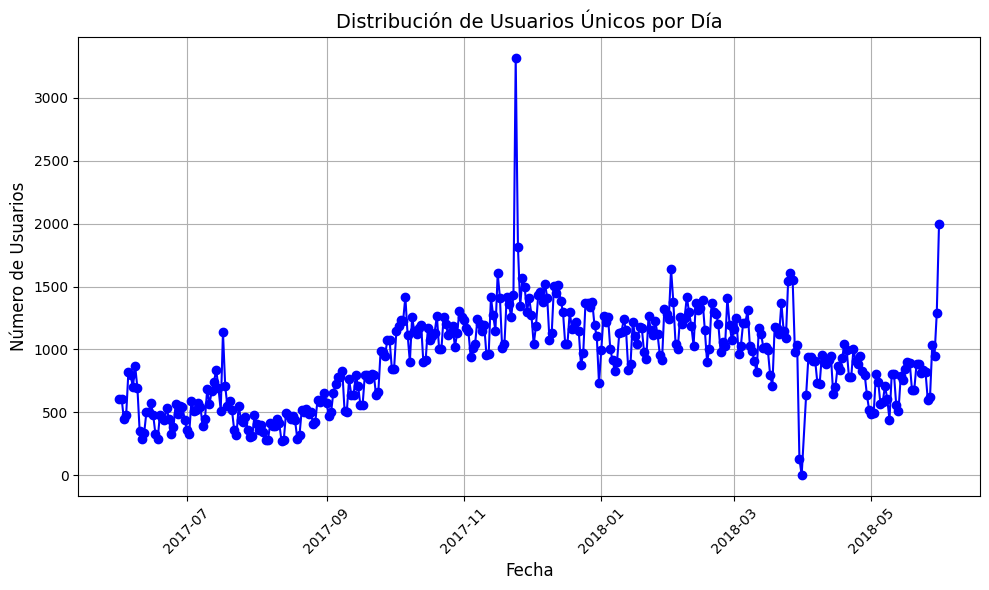

In [24]:
plt.figure(figsize= (10,6))
plt.plot(graf_dia['Date'], graf_dia['Usuarios'], marker='o', linestyle='-', color='b')
plt.title('Distribución de Usuarios Únicos por Día', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Se puede ve que el día con mayor cantidad de usuarios durante este periodo de tiempo fue a finales de noviembre del 2017 con cerca de 4000 usuarios y a principios de abril del 2018 no se registraron usuarios. El promedio de la cantidad de usuarios diarios es de 907.

In [25]:
#se calcula el WAU
wau_total = visits.groupby(['Year', 'Week']).agg({'Uid':'nunique'}).mean()
int(wau_total.iloc[0])

5716

In [26]:
#se agrupa por semana y se calcula la cantidad de usuarios unicos
graf_sem = visits.groupby('Week')['Uid'].nunique().reset_index()
graf_sem.columns = ['Week', 'Usuarios']
graf_sem.head()

,Week,Usuarios
0,1,6918
1,2,6703
2,3,6972
3,4,7060
4,5,8111


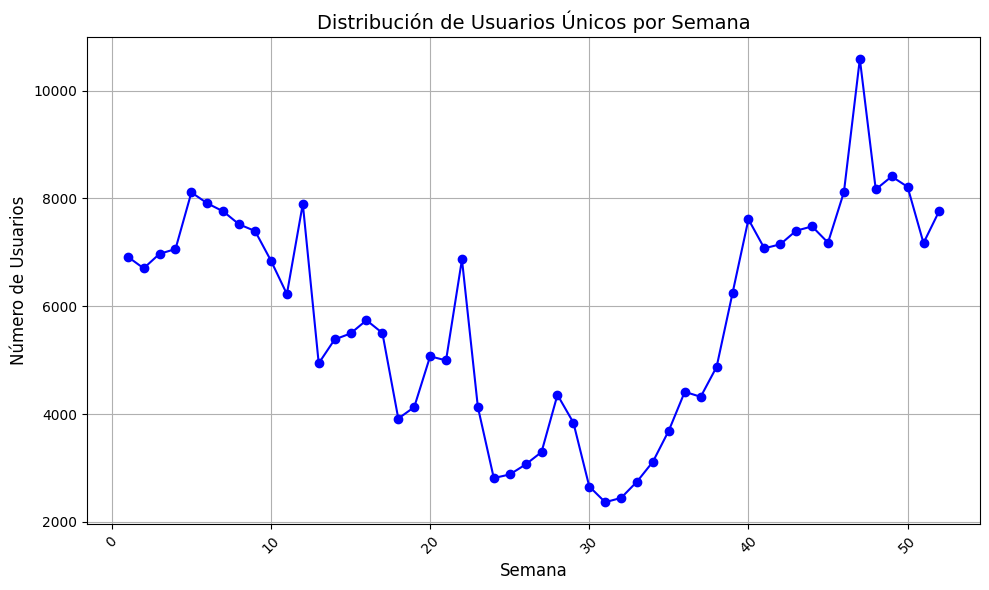

In [27]:
#se grafica la distribucion de usuarios por semana 
plt.figure(figsize= (10,6))
plt.plot(graf_sem['Week'], graf_sem['Usuarios'], marker='o', linestyle='-', color='b')
plt.title('Distribución de Usuarios Únicos por Semana', fontsize=14)
plt.xlabel('Semana', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- La semana 47 es la que más usuarios atrajo dentro del periodo analizado alcanzando más de 10000 vistas. se puede ver también que a partir de la semana 30 donde se obtuvo la menos cantidad de visitas, las mismas empezaron a incrementar y se mantiene al rededor de los 8000. Se tiene un promedio de 5716 usuarios activos al mes.

In [28]:
# se agrupa por mes y se calcula la cantidad de usuarios únicos 
graf_mes = visits.groupby('Month')['Uid'].nunique().reset_index()
graf_mes.columns = ['Month', 'Usuarios']
graf_mes

,Month,Usuarios
0,1,28716
1,2,28749
2,3,27473
3,4,21008
4,5,20701
5,6,13259
6,7,14183
7,8,11631
8,9,18975
9,10,29692


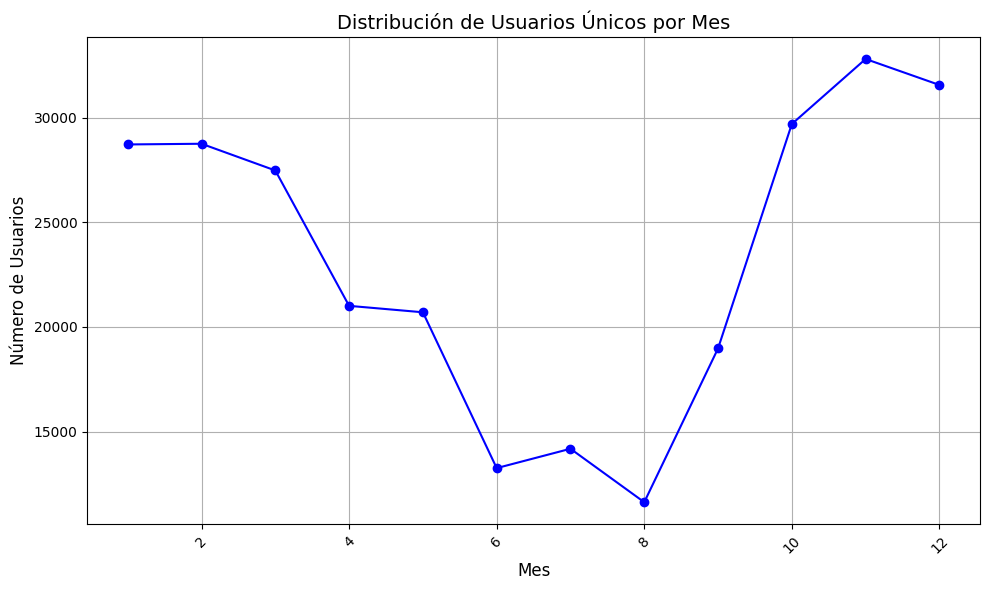

In [29]:
#se grafica para ver la distribucion de usuarios activos por mes
plt.figure(figsize= (10,6))
plt.plot(graf_mes['Month'], graf_mes['Usuarios'], marker='o', linestyle='-', color='b')
plt.title('Distribución de Usuarios Únicos por Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Usuarios', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
#se calcula el MAU 
mau_total = visits.groupby(['Year', 'Month']).agg({'Uid':'nunique'}).mean()
int(mau_total.iloc[0])

23228

- Es importante mencionar que los datos obtenidos empiezan desde junio del 2017 y van hasta finales de mayo del 2018. Por lo tanto los meses 1,2,3,4,5 pertenecen al 2018 y los meses 6,7,8,9,10,11,12 al 2017. Dicho eso, se puede corroborar que el mes con mayor cantidad de usuarios activos corresponde a novimebre del 2017, misma informacion que se obtuvo en las distribucione por dia y semana. El promedio de usuarios activos al mes es de 23228. 

2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [31]:
#sesiones por usuario diarias
sesiones_diarias = visits.groupby('Date').agg({'Uid': ['count', 'nunique']}).reset_index()
sesiones_diarias.columns = ['Date', 'n_sesiones', 'n_usuarios']
sesiones_diarias['sesiones_por_usuario'] = sesiones_diarias['n_sesiones']/sesiones_diarias['n_usuarios']
sesiones_diarias

,Date,n_sesiones,n_usuarios,sesiones_por_usuario
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024
...,...,...,...,...
359,2018-05-27,672,620,1.083871
360,2018-05-28,1156,1039,1.112608
361,2018-05-29,1035,948,1.091772
362,2018-05-30,1410,1289,1.093871


In [32]:
#se calcula la media de sesiones al día por usuario 
sesiones_diarias['n_sesiones'].mean()

np.float64(987.3626373626373)

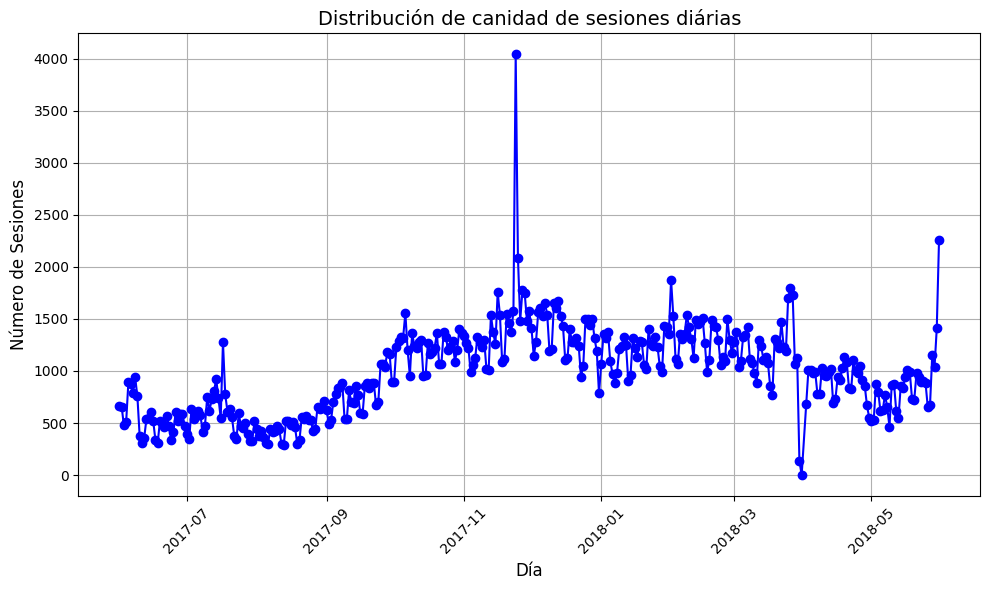

In [33]:
#se grafica la distirbucion de sesiones por usuario al dia 
plt.figure(figsize= (10,6))
plt.plot(sesiones_diarias['Date'], sesiones_diarias['n_sesiones'], marker='o', linestyle='-', color='b')
plt.title('Distribución de canidad de sesiones diárias', fontsize=14)
plt.xlabel('Día', fontsize=12)
plt.ylabel('Número de Sesiones', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Mediante este gráfico se puede ver la cantidad de sesiones diarias que se obtienen en el periodo de análisis. La mayor cantidad de sesiones está dentro del mes de noviembre 2017 superando las 4000, con un promedio de 987 sesiones diarias. 

3. ¿Cuál es la duración de cada sesión?

In [34]:
#se calcula el ASL para las sesiones 
visits['duracion_sec'] = (visits['End Ts'] - visits ['Start Ts']).dt.seconds

- se debe analizar la distribución para saber que medida se puede tomar como referencia 

<Axes: >

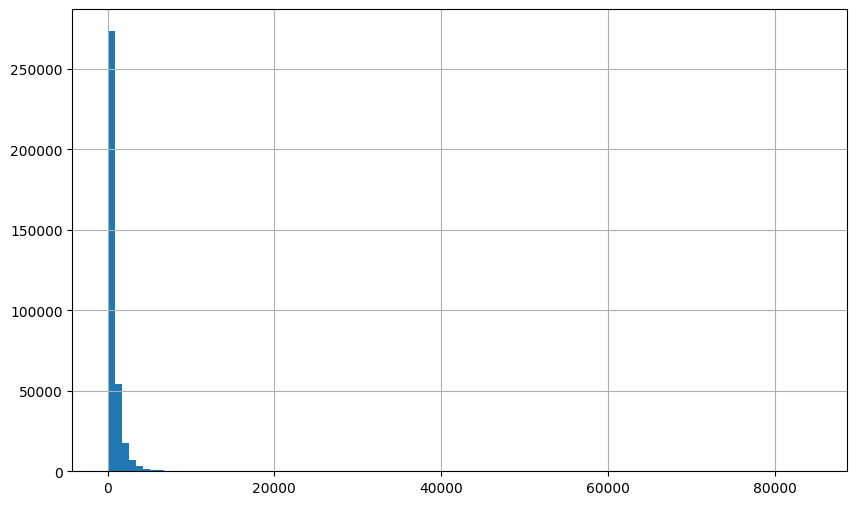

In [35]:
#se analiza la distribución con un histograma 
plt.figure (figsize = (10,6))
visits['duracion_sec'].hist (bins = 100)

- Al no ser una distribución normal se calcula la moda para saber la duración de las sesiones 

In [36]:
#se calcula la moda del tiempo de duración de la sesión
visits['duracion_sec'].mode()

0    60
Name: duracion_sec, dtype: int32

- 60 segundos para una aplicación de venta de entradas es un tiempo suficiente para poder realiar la compra de entrada a un evento específico. 

4. ¿Con qué frecuencia los usuarios regresan?

In [37]:
#se crea una copia de mi tabla visits solo con las columnas que necesito
visits1 = visits[['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']].copy()
visits1

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [38]:
#se identifica la primera visita del usuario 
first_visit = visits1.groupby('Uid')['Start Ts'].min()
first_visit.head()

Uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: Start Ts, dtype: datetime64[ns]

In [39]:
#se cambia de nombre a la columna del Series
first_visit.name = 'First visit'
first_visit

Uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: First visit, Length: 228169, dtype: datetime64[ns]

In [40]:
#se une con el dataframe visits1
visits1 = visits1.join (first_visit, on = 'Uid')

In [41]:
#se crea la columna fvisit month para tener solo la fecha en mes 
visits1['fvisit month'] = visits1['First visit'].dt.to_period('M')
visits1

,Device,End Ts,Source Id,Start Ts,Uid,First visit,fvisit month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12
...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11


In [42]:
# saco los dias entre la primera visita y la siguiente visita y creo nueva columna 
visits1['lifetime'] = (visits1['End Ts'] - visits1['First visit']).dt.days
visits1.head()

,Device,End Ts,Source Id,Start Ts,Uid,First visit,fvisit month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03,71
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12,0


In [43]:
#se pasa los dias a meses
visits1['lifetime'] = visits1['lifetime'] / 30.44
visits1['lifetime'].head()

0    0.000000
1    0.000000
2    0.000000
3    2.332457
4    0.000000
Name: lifetime, dtype: float64

In [44]:
#redondeo y paso a entero 
visits1['lifetime']  = visits1['lifetime'] .round().astype('int')
visits1.head()

,Device,End Ts,Source Id,Start Ts,Uid,First visit,fvisit month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12,0


In [45]:
#sacar mi columna date
visits1['date'] = visits1['Start Ts'].dt.date
visits1.head()

,Device,End Ts,Source Id,Start Ts,Uid,First visit,fvisit month,lifetime,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12,0,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02,0,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03,2,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12,0,2017-12-27


In [46]:
dau_mes = visits1.groupby (['date', 'lifetime', 'fvisit month'])['Uid'].nunique().reset_index()
dau_mes

,date,lifetime,fvisit month,Uid
0,2017-06-01,0,2017-06,605
1,2017-06-02,0,2017-06,608
2,2017-06-03,0,2017-06,445
3,2017-06-04,0,2017-06,476
4,2017-06-05,0,2017-06,820
...,...,...,...,...
4341,2018-05-31,10,2017-07,15
4342,2018-05-31,10,2017-08,5
4343,2018-05-31,11,2017-06,17
4344,2018-05-31,11,2017-07,19


In [47]:
dau_mensual = dau_mes.groupby(['fvisit month', 'lifetime'])['Uid'].mean().reset_index().rename (columns = {'Uid': 'dau_mensual'})
dau_mensual

,fvisit month,lifetime,dau_mensual
0,2017-06,0,337.088889
1,2017-06,1,32.448276
2,2017-06,2,23.083333
3,2017-06,3,28.745763
4,2017-06,4,34.431034
...,...,...,...
85,2018-04,0,390.250000
86,2018-04,1,21.209302
87,2018-04,2,6.230769
88,2018-05,0,529.419355


In [48]:
#agrupo por fvisit month para crear cohortes y ver el comportamiento por mes de ciclo de vida 
mau_mensual = visits1.groupby (['fvisit month', 'lifetime']).agg ({'Uid': 'nunique'}).reset_index().rename (columns= {'Uid': 'mau_mensual'})
mau_mensual

,fvisit month,lifetime,mau_mensual
0,2017-06,0,13259
1,2017-06,1,968
2,2017-06,2,716
3,2017-06,3,800
4,2017-06,4,917
...,...,...,...
85,2018-04,0,15709
86,2018-04,1,617
87,2018-04,2,64
88,2018-05,0,15273


In [49]:
frecuencia_retorno = pd.merge (dau_mensual, mau_mensual, on = ['fvisit month', 'lifetime'])
frecuencia_retorno['stickyf'] = frecuencia_retorno['dau_mensual'] / frecuencia_retorno ['mau_mensual']
frecuencia_retorno

,fvisit month,lifetime,dau_mensual,mau_mensual,stickyf
0,2017-06,0,337.088889,13259,0.025423
1,2017-06,1,32.448276,968,0.033521
2,2017-06,2,23.083333,716,0.032239
3,2017-06,3,28.745763,800,0.035932
4,2017-06,4,34.431034,917,0.037547
...,...,...,...,...,...
85,2018-04,0,390.250000,15709,0.024842
86,2018-04,1,21.209302,617,0.034375
87,2018-04,2,6.230769,64,0.097356
88,2018-05,0,529.419355,15273,0.034664


In [50]:
#se crea una tabla pivote para analizar el retorno de los usuarios respescto a tu estadiia en la plataforma
visits_pivot = frecuencia_retorno.pivot_table (index = 'fvisit month', columns = 'lifetime', values = 'stickyf', aggfunc= 'sum').round(3)
visits_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
fvisit month,,,,,,,,,,,,,
2017-06,0.025,0.034,0.032,0.036,0.038,0.038,0.044,0.037,0.039,0.041,0.041,0.048,0.143
2017-07,0.024,0.023,0.024,0.026,0.027,0.026,0.025,0.026,0.026,0.025,0.033,0.098,NaN
2017-08,0.023,0.024,0.025,0.026,0.027,0.026,0.026,0.028,0.028,0.035,0.119,NaN,NaN
2017-09,0.024,0.024,0.025,0.025,0.023,0.024,0.025,0.023,0.031,0.101,NaN,NaN,NaN
2017-10,0.024,0.024,0.024,0.022,0.022,0.023,0.023,0.031,0.108,NaN,NaN,NaN,NaN
2017-11,0.025,0.025,0.025,0.025,0.024,0.023,0.032,0.084,NaN,NaN,NaN,NaN,NaN
2017-12,0.024,0.024,0.022,0.023,0.022,0.030,0.092,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.024,0.024,0.024,0.022,0.030,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.025,0.025,0.023,0.031,0.117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Al analizar el retorno de los clientes en la plataforma durante su ciclo de vida, se puede ver que el factor es muy bajo dentro de los primeros meses. Conforme van saliendo las personas el factor de retorno va aumentado de poco en poco, considerando que los que se quedan hasta el final son los clientes más leales. 

#### 2. Ventas

- Se crearán cohortes mensuales para poder responder y analizar las siguientes preguntas.

1. ¿Cuándo empieza la gente a comprar? 

In [51]:
orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [52]:
#se identifica la primera compra del usuario 
first_order = orders.groupby ('Uid')['Buy Ts'].min()
first_order

Uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 10:13:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 10:14:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-22 23:55:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: Buy Ts, Length: 36523, dtype: datetime64[ns]

In [53]:
#renombro la columna 
first_order.name = 'First order'

In [54]:
#se une a la tabla visits1 lcon a primera compra del usuario 
first_vo = pd.merge (visits1, first_order, on = 'Uid', how = 'left')
first_vo.head()

,Device,End Ts,Source Id,Start Ts,Uid,First visit,fvisit month,lifetime,date,First order
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12,0,2017-12-20,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02,0,2018-02-19,NaT
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07,0,2017-07-01,NaT
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03,2,2018-05-20,2018-03-09 20:25:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12,0,2017-12-27,NaT


In [55]:
#creo la columna forder month 
first_vo['forder month'] = first_vo ['First order'].dt.to_period('M')
first_vo.head()

,Device,End Ts,Source Id,Start Ts,Uid,First visit,fvisit month,lifetime,date,First order,forder month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12,0,2017-12-20,NaT,NaT
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02,0,2018-02-19,NaT,NaT
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07,0,2017-07-01,NaT,NaT
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03,2,2018-05-20,2018-03-09 20:25:00,2018-03
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12,0,2017-12-27,NaT,NaT


In [56]:
#calcular la diferencia entre la primera visita y la primera compra 
first_vo['Dias conversion'] = (first_vo['First order'] - first_vo['First visit']).dt.days
first_vo.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid,First visit,fvisit month,lifetime,date,First order,forder month,Dias conversion
144023,desktop,2017-12-18 15:54:00,5,2017-12-18 15:28:00,12921318466273149528,2017-12-17 13:53:00,2017-12,0,2017-12-18,NaT,NaT,NaN
255217,desktop,2017-10-21 19:07:00,4,2017-10-21 19:06:00,7645281578096405792,2017-10-21 19:06:00,2017-10,0,2017-10-21,NaT,NaT,NaN
137929,desktop,2018-03-26 23:34:00,5,2018-03-26 23:25:00,11741265239984282000,2018-03-26 23:25:00,2018-03,0,2018-03-26,NaT,NaT,NaN
332487,desktop,2018-05-21 23:49:00,4,2018-05-21 23:34:00,11752049203857040063,2018-05-21 23:34:00,2018-05,0,2018-05-21,NaT,NaT,NaN
51337,desktop,2017-10-02 21:59:00,3,2017-10-02 21:54:00,3612814218375228455,2017-10-02 21:54:00,2017-10,0,2017-10-02,NaT,NaT,NaN
288348,touch,2017-10-15 11:01:00,5,2017-10-15 11:01:00,9300833816824853965,2017-10-10 18:07:00,2017-10,0,2017-10-15,2017-10-13 15:52:00,2017-10,2.0
88011,desktop,2018-03-11 19:59:00,4,2018-03-11 19:54:00,6880770209076469866,2018-02-15 22:19:00,2018-02,1,2018-03-11,NaT,NaT,NaN
238952,desktop,2017-07-31 18:58:00,1,2017-07-31 18:56:00,8025751140349280179,2017-07-30 22:54:00,2017-07,0,2017-07-31,2017-08-04 19:28:00,2017-08,4.0
63798,desktop,2017-07-02 21:50:00,9,2017-07-02 21:40:00,10712596312079888012,2017-07-02 21:40:00,2017-07,0,2017-07-02,NaT,NaT,NaN
232346,desktop,2017-10-14 21:51:00,4,2017-10-14 21:44:00,3276880046350921710,2017-06-30 10:13:00,2017-06,3,2017-10-14,NaT,NaT,NaN


In [57]:
#filtro solo los que han realizado una compra 
visits_converted = first_vo[first_vo['First order'].notnull()]
visits_converted.head()

,Device,End Ts,Source Id,Start Ts,Uid,First visit,fvisit month,lifetime,date,First order,forder month,Dias conversion
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03,2,2018-05-20,2018-03-09 20:25:00,2018-03,0.0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-09,0,2017-09-03,2017-09-04 12:46:00,2017-09,0.0
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2017-06-04 14:17:00,2017-06,8,2018-02-06,2017-06-25 08:54:00,2017-06,20.0
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018-02-10 12:17:00,2018-02,0,2018-02-12,2018-02-12 19:48:00,2018-02,2.0
25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017-09-23 23:27:00,2017-09,2,2017-12-05,2017-09-27 09:23:00,2017-09,3.0


In [58]:
dias_conversion = visits_converted.groupby('Device')['Dias conversion'].mean()
dias_conversion

Device
desktop    33.229727
touch      34.291225
Name: Dias conversion, dtype: float64

- los dias de conversión entre usuarios que usan desktop y touch es muy similar, pasado el mes desde la primera visita. 

In [59]:
#se calcula la cantidad de días que tardan en convertirse por cohorte 
visits_conversion = visits_converted.groupby('fvisit month')['Dias conversion'].mean()
visits_conversion

fvisit month
2017-06    66.346373
2017-07    62.838226
2017-08    57.415224
2017-09    38.480889
2017-10    25.796777
2017-11    22.893568
2017-12    14.746083
2018-01    11.799419
2018-02     7.656437
2018-03     4.298438
2018-04     3.776488
2018-05     0.829176
Freq: M, Name: Dias conversion, dtype: float64

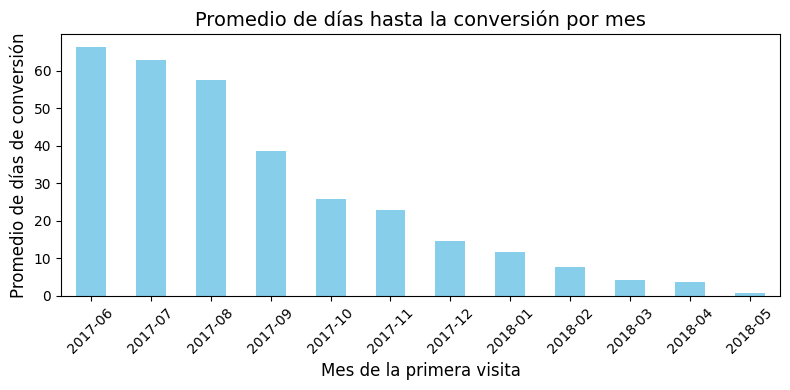

In [60]:
#se crea un gráfico para ver como cambia los días que tardan en convertirse los usuarios dependiendo de su primera visita 
plt.figure (figsize=(8,4))
visits_conversion.plot (kind = 'bar', color = 'skyblue')
plt.title('Promedio de días hasta la conversión por mes', fontsize=14)
plt.xlabel('Mes de la primera visita', fontsize=12)
plt.ylabel('Promedio de días de conversión', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()  # Para que no se corten las etiquetas
plt.show()

- Las primeras cohortes son las que mas tardan en convertirse, se puede ver que según va pasando el tiempo, menos tiempo demoran las cohortes en convertirse.

In [61]:
#se calcula cuanto días tardan en convertirse los usuraios dependiendo de la fuente de llegada 
channel_converted = visits_converted.groupby('Source Id')['Dias conversion'].mean()
channel_converted

Source Id
1     34.420417
2     42.471122
3     30.747070
4     31.977920
5     23.044368
7      0.000000
9     43.035044
10    33.663675
Name: Dias conversion, dtype: float64

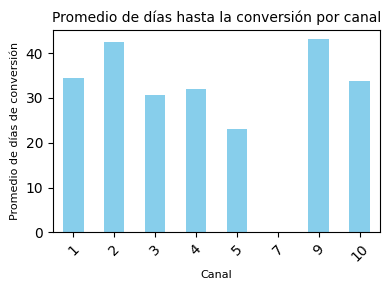

In [62]:
#gráfico para visualizar el tiempo que demoran en convertirse los usarios por canal de marketing 
plt.figure (figsize=(4,3))
channel_converted.plot (kind = 'bar', color = 'skyblue')
plt.title('Promedio de días hasta la conversión por canal', fontsize=10)
plt.xlabel('Canal', fontsize=8)
plt.ylabel('Promedio de días de conversión', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()  # Para que no se corten las etiquetas
plt.show()

- La fuente en la que los usuarios menos tardan en convertirse es la 5, seguida  de la fuente 3. 

<Axes: >

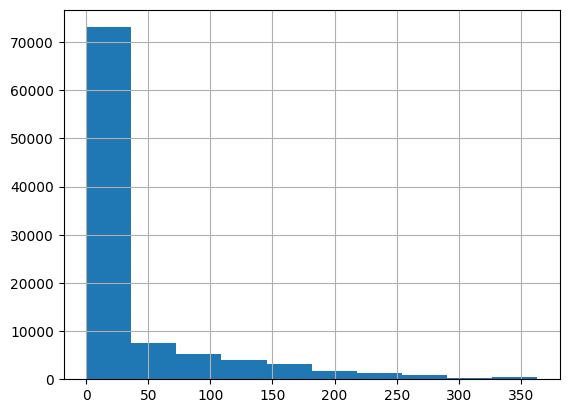

In [63]:
visits_converted['Dias conversion'].hist()

- Mediante este histograma se puede ver la distribución general de la cantidad de días que tardan los usuarios en convertirse y se concluye que la gran mayoría tardan menos de 50 días, lo que corrobora los resultado anteriores.  

2. ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [64]:
orders.sort_values(['Uid','Buy Ts'])

,Buy Ts,Revenue,Uid
27944,2018-01-03 21:51:00,0.55,313578113262317
213,2017-06-03 10:13:00,1.22,1575281904278712
252,2017-06-03 17:39:00,1.83,1575281904278712
12235,2017-10-11 18:33:00,73.33,2429014661409475
31462,2018-01-28 15:54:00,2.44,2464366381792757
...,...,...,...
8919,2017-09-24 23:48:00,0.24,18445407535914413204
9023,2017-09-25 15:56:00,0.12,18445407535914413204
42213,2018-03-26 22:54:00,4.22,18445601152732270159
35572,2018-02-18 19:34:00,9.78,18446156210226471712


In [65]:
#uno el primer pedido a la tabla orders
pedidos = orders.join (first_order, on = 'Uid')
pedidos.head()

,Buy Ts,Revenue,Uid,First order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [66]:
#se encuentra el mes de la fecha del primer pedido y de la fehca de pedido
pedidos['first_order_month'] = pedidos['First order'].dt.to_period('M')
pedidos['order_month'] = pedidos['Buy Ts'].dt.to_period('M')
pedidos.head()

,Buy Ts,Revenue,Uid,First order,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06,2017-06


In [67]:
#se cuenta cuantos pedidos hay por mes 
pedidos_mes = pedidos.groupby('first_order_month')['Uid'].count()
pedidos_mes

first_order_month
2017-06    4438
2017-07    2910
2017-08    2188
2017-09    3878
2017-10    6005
2017-11    5900
2017-12    5894
2018-01    4308
2018-02    4470
2018-03    4484
2018-04    2690
2018-05    3249
2018-06       1
Freq: M, Name: Uid, dtype: int64

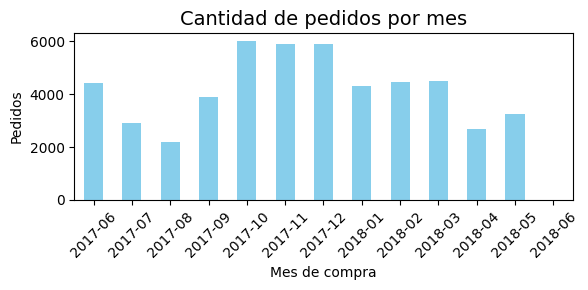

In [68]:
#grafico para ver distribucion de cantdad de pedidos mensaules 
plt.figure (figsize=(6,3))
pedidos_mes.plot (kind = 'bar', color = 'skyblue')
plt.title('Cantidad de pedidos por mes', fontsize=14)
plt.xlabel('Mes de compra', fontsize=10)
plt.ylabel('Pedidos', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()  # Para que no se corten las etiquetas
plt.show()

- Las cohortes que mas pedidos hacen son las del mes de octubre, noviembre y diciembre del 2017. Se podría analizar las razones sobre las cuales las personas tienen a asistir a más evento en esos meses. Podría ser porque se acerca fin de mes, hay más feriados y eventos o porque el clima en esas fechas empieza a enfriar e incita a asistir a eventos en lugar de paseos al aire libre 

3. ¿Cuál es el tamaño promedio de compra?

In [69]:
#se agrupa por usuario y por mes de compra para encontrar la cantidad de pedidos por usuario por mes
tamano_pedido = pedidos.groupby(['Uid', 'order_month'])['Uid'].count().reset_index(name='n_pedido').sort_values(by = ['Uid', 'order_month'])
tamano_pedido

,Uid,order_month,n_pedido
0,313578113262317,2018-01,1
1,1575281904278712,2017-06,2
2,2429014661409475,2017-10,1
3,2464366381792757,2018-01,1
4,2551852515556206,2017-11,2
...,...,...,...
41014,18445147675727495770,2017-11,1
41015,18445407535914413204,2017-09,3
41016,18445601152732270159,2018-03,1
41017,18446156210226471712,2018-02,1


In [70]:
mean_usuario = tamano_pedido['n_pedido'].mean()
mean_usuario

np.float64(1.2290645798288597)

In [71]:
#se calcula la cantidad de 
mean_mes = tamano_pedido.groupby ('order_month')['n_pedido'].mean().reset_index()
mean_mes

,order_month,n_pedido
0,2017-06,1.163618
1,2017-07,1.191028
2,2017-08,1.227582
3,2017-09,1.231636
4,2017-10,1.214759
5,2017-11,1.244557
6,2017-12,1.258195
7,2018-01,1.211134
8,2018-02,1.240254
9,2018-03,1.273858


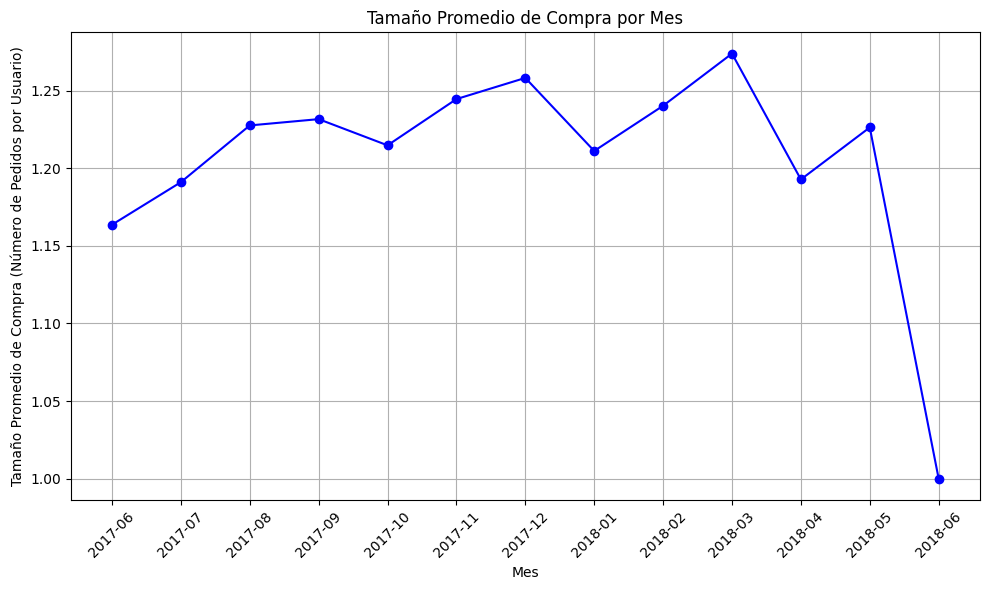

In [72]:
#se grafica para ver los resultados de tamaño promedio de pedidos por usuario por mes. 
plt.figure(figsize=(10, 6))
plt.plot(mean_mes['order_month'].astype('str'), mean_mes['n_pedido'], marker='o', color='b')
plt.title('Tamaño Promedio de Compra por Mes')
plt.xlabel('Mes')
plt.ylabel('Tamaño Promedio de Compra (Número de Pedidos por Usuario)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar las fechas para mayor claridad
plt.tight_layout()  # Ajusta los márgenes
plt.show()

- Se puede ver que la cantidad de pedidos promedio por usuario al mes es muy cercano a 1 y que el incremento con el paso del tiempo es muy limitado. Se puede ver que hay un leve incremento en maro del 2018 pero posterior a eso vuelve a bajar.  

4. ¿Cuánto dinero traen? (LTV)

In [73]:
#se une la tabla orders con la fecha de la primera orden 
orders2 = orders.join (first_order, on = 'Uid')
orders2

,Buy Ts,Revenue,Uid,First order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00


In [74]:
#se calcula la ultima fecha de compra 
Last_order = orders2.groupby ('Uid')['Buy Ts'].max()
Last_order

Uid
313578113262317        2018-01-03 21:51:00
1575281904278712       2017-06-03 17:39:00
2429014661409475       2017-10-11 18:33:00
2464366381792757       2018-01-28 15:54:00
2551852515556206       2017-11-24 11:24:00
                               ...        
18445147675727495770   2017-11-24 09:03:00
18445407535914413204   2017-09-25 15:56:00
18445601152732270159   2018-03-26 22:54:00
18446156210226471712   2018-02-18 19:34:00
18446167067214817906   2017-10-17 10:16:00
Name: Buy Ts, Length: 36523, dtype: datetime64[ns]

In [75]:
# se renomabra la columna para unir a la tabla orders2
Last_order.name = 'Last order'

In [76]:
#se junta la columna last order a mi df orders2
orders2 = orders2.join(Last_order, on = 'Uid')
orders2

,Buy Ts,Revenue,Uid,First order,Last order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:58:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31 23:56:00


In [77]:
#se calcula la diferencia entre la ultima y primera orden para encontrar el lifetime 
orders2['lifetime'] = (orders2['Last order'] - orders2['First order']).dt.days
orders2.head(20)

,Buy Ts,Revenue,Uid,First order,Last order,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:10:00,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:25:00,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:27:00,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:29:00,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:58:00,0
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01 08:43:00,0
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-05 14:30:00,4
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2018-05-13 18:28:00,346
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01 09:22:00,0
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01 09:23:00,0


In [78]:
#convierto de dias a mes el lifetime 
orders2['lifetime'] = orders2['lifetime'] / 30.44
orders2.head(20)

,Buy Ts,Revenue,Uid,First order,Last order,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:10:00,0.000000
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:25:00,0.000000
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:27:00,0.000000
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:29:00,0.000000
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:58:00,0.000000
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01 08:43:00,0.000000
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-05 14:30:00,0.131406
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2018-05-13 18:28:00,11.366623
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01 09:22:00,0.000000
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01 09:23:00,0.000000


In [79]:
orders2['lifetime']= orders2['lifetime'].round().astype('int')
orders2.sample(20)

,Buy Ts,Revenue,Uid,First order,Last order,lifetime
26313,2017-12-26 22:57:00,3.67,18148628883638557458,2017-12-26 22:57:00,2017-12-26 22:57:00,0
21232,2017-11-30 22:20:00,6.72,11731632440555246055,2017-11-30 22:20:00,2017-11-30 22:20:00,0
27463,2017-12-31 23:17:00,3.67,2919141490251993368,2017-12-31 23:17:00,2017-12-31 23:17:00,0
678,2017-06-06 22:38:00,2.32,18244949422079406964,2017-06-06 22:38:00,2017-06-06 22:38:00,0
17931,2017-11-16 19:02:00,4.58,5256528593328430473,2017-11-16 19:02:00,2017-11-16 19:02:00,0
38657,2018-03-07 10:59:00,14.48,5139615590553126732,2017-06-29 13:09:00,2018-05-29 15:42:00,11
19363,2017-11-24 16:07:00,0.85,489893382835867054,2017-11-24 16:07:00,2018-01-11 22:33:00,2
39739,2018-03-13 22:05:00,1.83,10887915598184408412,2018-03-13 22:05:00,2018-03-13 22:05:00,0
48860,2018-05-25 07:45:00,4.03,970975784987511180,2017-11-04 14:03:00,2018-05-31 07:24:00,7
19216,2017-11-24 11:47:00,3.05,15270569646492290826,2017-11-24 11:47:00,2017-11-24 13:44:00,0


In [80]:
#creo la columna forder month para crear cohortes 
orders2['forder month'] = orders2['First order'].dt.to_period('M')
orders2.head(10)

,Buy Ts,Revenue,Uid,First order,Last order,lifetime,forder month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:10:00,0,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:25:00,0,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:27:00,0,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:29:00,0,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:58:00,0,2017-06
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01 08:43:00,2017-06-01 08:43:00,0,2017-06
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01 08:54:00,2017-06-05 14:30:00,0,2017-06
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2018-05-13 18:28:00,11,2017-06
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01 09:22:00,2017-06-01 09:22:00,0,2017-06
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01 09:23:00,2017-06-01 09:23:00,0,2017-06


In [81]:
#agrupo por cohorte y lifetime y sumo el revenue 
ltv_rev = orders2.groupby(['forder month', 'lifetime'])['Revenue'].sum().reset_index()
ltv_rev

,forder month,lifetime,Revenue
0,2017-06,0,7527.78
1,2017-06,1,410.18
2,2017-06,2,161.41
3,2017-06,3,377.61
4,2017-06,4,742.87
...,...,...,...
85,2018-04,1,1071.69
86,2018-04,2,705.18
87,2018-05,0,13663.04
88,2018-05,1,262.72


In [82]:
#agrupo por cohorte y lifetime y cuento mis usuarios unicos 
ltv_user = orders2.groupby(['forder month', 'lifetime'])['Uid'].nunique().reset_index()
ltv_user

,forder month,lifetime,Uid
0,2017-06,0,1703
1,2017-06,1,28
2,2017-06,2,18
3,2017-06,3,19
4,2017-06,4,43
...,...,...,...
85,2018-04,1,52
86,2018-04,2,6
87,2018-05,0,2970
88,2018-05,1,18


In [83]:
#agrupo mis 2 tablas para calcular el ltv 
ltv_month = pd.merge (ltv_rev, ltv_user, on = ['forder month', 'lifetime']).reset_index()
ltv_month

,index,forder month,lifetime,Revenue,Uid
0,0,2017-06,0,7527.78,1703
1,1,2017-06,1,410.18,28
2,2,2017-06,2,161.41,18
3,3,2017-06,3,377.61,19
4,4,2017-06,4,742.87,43
...,...,...,...,...,...
85,85,2018-04,1,1071.69,52
86,86,2018-04,2,705.18,6
87,87,2018-05,0,13663.04,2970
88,88,2018-05,1,262.72,18


In [84]:
#calculo el ltv 
ltv_month['ltv'] = ltv_month['Revenue'] / ltv_month ['Uid']
ltv_month

,index,forder month,lifetime,Revenue,Uid,ltv
0,0,2017-06,0,7527.78,1703,4.420305
1,1,2017-06,1,410.18,28,14.649286
2,2,2017-06,2,161.41,18,8.967222
3,3,2017-06,3,377.61,19,19.874211
4,4,2017-06,4,742.87,43,17.276047
...,...,...,...,...,...,...
85,85,2018-04,1,1071.69,52,20.609423
86,86,2018-04,2,705.18,6,117.530000
87,87,2018-05,0,13663.04,2970,4.600350
88,88,2018-05,1,262.72,18,14.595556


In [85]:
#se crea una tabla pivote para ver cambio del ltv en el tiempo 
ltv_pivot = ltv_month.pivot_table(index = 'forder month', columns= 'lifetime', values= 'ltv', aggfunc= 'sum')
ltv_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12
forder month,,,,,,,,,,,,,
2017-06,4.420305,14.649286,8.967222,19.874211,17.276047,15.230000,11.701923,20.785217,35.049375,11.575000,90.133333,230.281724,125.1884
2017-07,5.653227,11.232222,17.272759,16.442414,24.979231,15.334783,14.774333,11.280000,17.894118,30.915882,81.011364,167.186000,NaN
2017-08,4.921070,15.463500,16.910937,16.351818,13.947826,9.955500,9.591290,12.222333,61.351176,96.727308,NaN,NaN,NaN
2017-09,4.744038,18.720741,15.084545,12.979143,47.458857,48.586667,14.502653,531.433200,41.309412,265.211429,NaN,NaN,NaN
2017-10,4.612171,14.263394,18.975222,14.642097,26.004058,15.008033,13.659600,30.713774,56.471538,NaN,NaN,NaN,NaN
2017-11,5.097645,9.614952,12.262330,14.883143,21.572500,21.984651,23.451964,123.070000,NaN,NaN,NaN,NaN,NaN
2017-12,4.414436,9.418854,13.126437,13.033226,8.034250,220.875455,35.853000,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,3.965295,16.165333,10.900984,14.335814,41.461714,67.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.094436,15.525568,7.336364,23.526207,14.884000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Al calcular el ltv por por cohorte a lo largo del tiempo podemos ver como va cambiando la cantidad promedio de dinero que un cliente deja a lo largo de su vida en la empresa. se puede ve que conforme van pasando los meses, va aumentando la cantidad de dinero en la mayoria de las cohortesy que para todas el ingreo incial es muy bajo. Conforme los usuarios van confiando y sintiendose más comodos con la aplicación, tienen a gastar más plata. 

In [ ]:
#selecciono solo las columas de que quiero unir con orders para calcular el ltv por source 
visits_source = visits_converted[['Uid', 'Source Id']]

In [133]:
# uno mi tabla orders2 con visits para incorporar el source id 
orders_source = orders2.merge (visits_source, on='Uid', how='left')
orders_source.head()

,Buy Ts,Revenue,Uid,First order,Last order,lifetime,forder month,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:10:00,0,2017-06,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:25:00,0,2017-06,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:27:00,0,2017-06,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:29:00,0,2017-06,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:58:00,0,2017-06,3


In [134]:
rev_ltv_source = orders_source.groupby(['forder month', 'Source Id'])['Revenue'].sum().reset_index()
rev_ltv_source

,forder month,Source Id,Revenue
0,2017-06,1,1183274.50
1,2017-06,2,850896.10
2,2017-06,3,59913.95
3,2017-06,4,133057.98
4,2017-06,5,481760.33
...,...,...,...
81,2018-05,4,6864.09
82,2018-05,5,4812.78
83,2018-05,9,560.68
84,2018-05,10,1390.99


In [136]:
#calculo la cantidad de usuarios por mes y source 
user_ltv_source = orders_source.groupby(['forder month', 'Source Id'])['Uid'].nunique().reset_index()
user_ltv_source

,forder month,Source Id,Uid
0,2017-06,1,401
1,2017-06,2,457
2,2017-06,3,874
3,2017-06,4,644
4,2017-06,5,571
...,...,...,...
81,2018-05,4,987
82,2018-05,5,703
83,2018-05,9,98
84,2018-05,10,164


In [140]:
#uno mis 2 df creados y calculo el ltv 
ltv_source = rev_ltv_source.merge (user_ltv_source, on = ['forder month', 'Source Id']).rename (columns= {'forder month': 'dt month', 'Source Id': 'source_id'})
ltv_source['ltv'] = ltv_source['Revenue'] / ltv_source ['Uid']
ltv_source

,dt month,source_id,Revenue,Uid,ltv
0,2017-06,1,1183274.50,401,2950.809227
1,2017-06,2,850896.10,457,1861.917068
2,2017-06,3,59913.95,874,68.551430
3,2017-06,4,133057.98,644,206.611770
4,2017-06,5,481760.33,571,843.713363
...,...,...,...,...,...
81,2018-05,4,6864.09,987,6.954498
82,2018-05,5,4812.78,703,6.846060
83,2018-05,9,560.68,98,5.721224
84,2018-05,10,1390.99,164,8.481646


In [142]:
#creo una tabla pivote para ver el cambio del ltv por fuente a lo largo del tiempo 
ltv_source_pivot = ltv_source.pivot_table(index = 'source_id', columns= 'dt month', values= 'ltv', aggfunc= 'sum')
ltv_source_pivot

dt month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06
source_id,,,,,,,,,,,,,
1,2950.809227,651.980025,382.877569,359.068802,65.191561,152.198019,37.730775,104.667179,48.690108,268.966701,93.660793,12.743923,NaN
2,1861.917068,213.046389,257.983428,1902.045944,79.024720,108.447302,214.258203,80.973193,28.775865,219.907588,52.795829,13.890482,NaN
3,68.551430,69.308503,21.456191,56.141174,10.588465,20.367925,7.106659,10.586692,7.796091,12.890173,9.618635,7.006412,NaN
4,206.611770,98.780422,52.323828,116.132467,14.083558,35.719179,8.613648,10.531582,8.740708,9.982793,9.627486,6.954498,3.42
5,843.713363,59.977028,326.402397,345.146160,23.163037,32.319113,40.269479,36.971970,13.918949,48.239640,14.633291,6.846060,NaN
7,NaN,NaN,1.220000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,27.059185,25.685833,26.232437,14.405495,10.816903,15.893762,8.911754,6.451187,7.382778,5.053515,14.014691,5.721224,NaN
10,31.415417,8.921831,9.752857,5.348364,4.644788,11.567104,5.388537,3.967377,5.075593,7.331434,3.726528,8.481646,NaN


- Al calcular el ltv por fuente a lo largo del tiempo se puede ver que la fuente 1 y 2 son las que mas ingresos generan por usuario, sin embargo existen meses como febrero del 2018 que cae mucho. La fuente 3, 9 y 10 es la que que menos ingresos por usuario generan. La fuente 7 no genera nada de ingresos. Se debe analizar la cantidad de plata invertida en marketing para ver si estos resultado son coherentes con el costo asociado. 

#### 3. Marketing 

 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [86]:
#se cuacula el total de dinero que se gastó en Marketing duante este periodo 
total_costos = costs['costs'].sum()
total_costos

np.float64(329131.62)

- La cantidad de dinero que se gasto en marketing durante este periodo fue de $329,131.62 dolares considerando el gasto de todas las fuentes 

In [87]:
#se calcula el gasto por fuente de adquisición 
costos_fuente = costs.groupby('source_id')['costs'].sum().reset_index()
costos_fuente

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


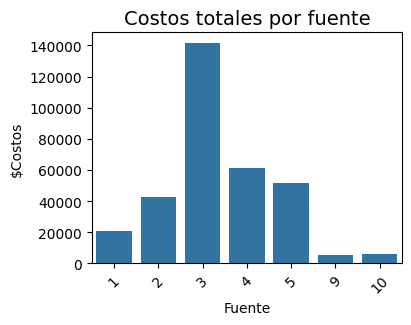

In [88]:
#se grafica para visualizar el costo por fuente
plt.figure(figsize=(4,3))
sns.barplot(x='source_id', y='costs', data=costos_fuente)
plt.title('Costos totales por fuente', fontsize=14)
plt.xlabel('Fuente', fontsize=10)
plt.ylabel('$Costos', fontsize=10)
plt.xticks(rotation=45)
plt.show()

- Se puede identificar la fuente en la que más se invirtó siendo la 3 con un total de $141321.63. Se puede ver que estos costos superan en una gran cantidad a los costos de las otras fuentes. Este viene a ser casi la mitad de todo el presupuesto utilizado en Marketing. Es importante ver las ganancias que esta fuente genera. 
- Ademas se puede ver que para las fuentes 6,7,8 no se ha invertido en marketing. 

In [89]:
#se saca el mes de la fecha de los costos
costs['dt month'] = costs['dt'].dt.to_period('M')
costs.head()

,source_id,dt,costs,dt month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [90]:
#se calcula los costos por mes
costos_mes = costs.groupby('dt month')['costs'].sum().reset_index()
costos_mes

,dt month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


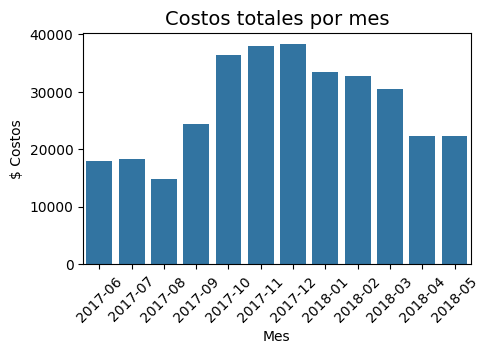

In [91]:
#se grafica para visualizar la distribucion de costos a lo largo de los meses 
plt.figure(figsize=(5,3))
sns.barplot(x='dt month', y='costs', data=costos_mes)
plt.title('Costos totales por mes', fontsize=14)
plt.xlabel('Mes', fontsize=10)
plt.ylabel('$ Costos', fontsize=10)
plt.xticks(rotation=45)
plt.show()

- Se puede identificar que los meses en los que más se invirtió en marketing es entre el 10-11-12 del 2017. Al comprar con la cantidad de pedidos por mes, se corrobora que los mismos meses son los que más pedidos registraron a su vez. 

In [92]:
costs.head()

,source_id,dt,costs,dt month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [93]:
cost_mes_fuente = costs.groupby(['dt month', 'source_id'])['costs'].sum().reset_index()
cost_mes_fuente

,dt month,source_id,costs
0,2017-06,1,1125.61
1,2017-06,2,2427.38
2,2017-06,3,7731.65
3,2017-06,4,3514.80
4,2017-06,5,2616.12
...,...,...,...
79,2018-05,3,9411.42
80,2018-05,4,4214.21
81,2018-05,5,3669.56
82,2018-05,9,362.17


In [94]:
# se crea una tabla pivote para ver los valores
cost_mesfuente_pivot = cost_mes_fuente.pivot_table (index = 'dt month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
cost_mesfuente_pivot

source_id,1,2,3,4,5,9,10
dt month,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


- se pueden obervar los costos mensules para las distintas fuentes. Se puede ver que los costos mas altos estan entre los meses de octubre 2017 a marzo 2018 para la fuente 3.  

 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [111]:
#calculo de la cantidad de clientes convertidos por cada fuente y mes 
cac_fuente = visits_converted.groupby(['Source Id'])['Uid'].nunique().reset_index().rename (columns= {'Source Id': 'source_id'})
cac_fuente

,source_id,Uid
0,1,7138
1,2,7305
2,3,13846
3,4,14253
4,5,10156
5,7,1
6,9,2793
7,10,1773


In [113]:
#uno mis tablas de costos y usuraios de las fuentes en una sola tabla
cac = cac_fuente.merge(costos_fuente, on = 'source_id', how='left')
cac.columns = ['Source Id', 'n_users','costs']
cac

,Source Id,n_users,costs
0,1,7138,20833.27
1,2,7305,42806.04
2,3,13846,141321.63
3,4,14253,61073.60
4,5,10156,51757.10
5,7,1,NaN
6,9,2793,5517.49
7,10,1773,5822.49


In [98]:
#reemplazo con 0 las filas de costs que se refieren a fuentes que no tuvieron inversion 
cac['costs'] = cac['costs'].fillna(0)
cac

,Source Id,n_users,costs
0,1,7138,20833.27
1,2,7305,42806.04
2,3,13846,141321.63
3,4,14253,61073.60
4,5,10156,51757.10
5,7,1,0.00
6,9,2793,5517.49
7,10,1773,5822.49


In [99]:
#calculo el cac por fuente 
cac['cac'] = cac['costs'] / cac ['n_users']
cac

,Source Id,n_users,costs,cac
0,1,7138,20833.27,2.918642
1,2,7305,42806.04,5.859828
2,3,13846,141321.63,10.206676
3,4,14253,61073.60,4.284965
4,5,10156,51757.10,5.096209
5,7,1,0.00,0.000000
6,9,2793,5517.49,1.975471
7,10,1773,5822.49,3.283976


- Al comparar los costos totales por cada una de las fuentes durante todo el periodo con la cantidad de usuarios convertidos por cada fuente, se puede ver que el costo de adquisición de clientes es relativamente bajo. Se puede ver que la fuente que más clientes ha traido es la 4, siendo la fuente más rentable y no es en la que más dinero de invirtió. Es evidente que a menor inversión menor cantidad de clientes atraidos como se puede ver en la fuente 9 y 10. Se podría analizar la posibilidad de reducir la cantidad invertida en la fuente 3 que sale más caro e invertirlo en la fuente 4 para atraer más clientes por menos de la mitad del precio. 

In [ ]:
#agrupo por mes y source id para calcular el cac a lo largo del tiempo
cac_mes = visits_converted.groupby(['forder month','Source Id'])['Uid'].nunique().reset_index().rename (columns= {'Source Id': 'source_id', 'forder month': 'dt month'})
cac_mes

,dt month,source_id,Uid
0,2017-06,1,401
1,2017-06,2,457
2,2017-06,3,874
3,2017-06,4,644
4,2017-06,5,571
...,...,...,...
81,2018-05,4,987
82,2018-05,5,703
83,2018-05,9,98
84,2018-05,10,164


In [119]:
#uno mis df cac fuente con costo mes fuente para calcular el cac a lo largo del tiempo 
cac_month = pd.merge (cac_mes, cost_mes_fuente, on = (['dt month', 'source_id']))
cac_month ['cac'] = cac_month ['costs'] / cac_month ['Uid']
cac_month

,dt month,source_id,Uid,costs,cac
0,2017-06,1,401,1125.61,2.807007
1,2017-06,2,457,2427.38,5.311554
2,2017-06,3,874,7731.65,8.846281
3,2017-06,4,644,3514.80,5.457764
4,2017-06,5,571,2616.12,4.581646
...,...,...,...,...,...
79,2018-05,3,1006,9411.42,9.355288
80,2018-05,4,987,4214.21,4.269716
81,2018-05,5,703,3669.56,5.219858
82,2018-05,9,98,362.17,3.695612


In [122]:
#se crea una tabla pivote para ver el cambio del cac por fuente a lo largo del tiempo 
cac_pivot = cac_month.pivot_table(index = 'source_id', columns= 'dt month', values= 'cac', aggfunc= 'sum').round (3)
cac_pivot

dt month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,2.807,2.682,3.305,2.856,2.780,2.590,2.593,3.427,3.413,2.800,3.395,2.983
2,5.312,5.401,6.399,5.529,5.647,5.466,5.789,6.739,7.035,6.020,7.522,4.317
3,8.846,10.733,12.512,9.664,9.702,10.152,9.359,11.418,10.416,10.284,12.201,9.355
4,5.458,4.802,6.448,5.744,3.795,3.051,4.049,4.193,3.888,4.292,5.015,4.270
5,4.582,5.005,4.720,4.465,4.304,5.724,5.272,5.782,5.175,5.261,5.566,5.220
9,1.550,1.939,1.556,1.872,1.600,1.691,1.924,2.498,2.553,1.455,4.611,3.696
10,2.618,4.645,4.153,4.188,2.422,4.330,5.251,5.036,2.717,2.157,2.696,2.499


- Aquí se analiza el costo de adquisición de clientes por cada fuente a lo largo de todo el periodo. Se puede ver que casi todas las fuentes tienen el mismo cac a lo largo del tiempo y relativamente bajos. A diferencia de la fuente 3 la cual incrementa su cac hasta 12, siendo el valor más alto ded todos. 

 3. ¿Cuán rentables eran las inversiones? (ROMI)

In [144]:
# se agrupa la tabla ltv_sourve con cac_month para calcular el ROMI por fuente de adquisición a lo largo del tiempo
romi = pd.merge(cac_month[['dt month', 'source_id', 'cac']], ltv_source[['dt month', 'source_id', 'ltv']], on=(['dt month', 'source_id']), how='left')
romi ['romi'] = romi['ltv'] / romi ['cac']
romi 

,dt month,source_id,cac,ltv,romi
0,2017-06,1,2.807007,2950.809227,1051.229556
1,2017-06,2,5.311554,1861.917068,350.540954
2,2017-06,3,8.846281,68.551430,7.749180
3,2017-06,4,5.457764,206.611770,37.856487
4,2017-06,5,4.581646,843.713363,184.150700
...,...,...,...,...,...
79,2018-05,3,9.355288,7.006412,0.748925
80,2018-05,4,4.269716,6.954498,1.628796
81,2018-05,5,5.219858,6.846060,1.311541
82,2018-05,9,3.695612,5.721224,1.548113


- En un vistaso general se puede ver que el ltv es mayor que el cac para todas las fuente con una diferencia bastante alta en casi todas las fuentes. 

In [145]:
#se crea una tabla pivote para visualizar el cambio del romi por fuente a lo largo del tiempo
romi_pivot = romi.pivot_table(index= 'source_id', columns= 'dt month', values = 'romi', aggfunc= 'sum')
romi_pivot

dt month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,1051.229556,243.076588,115.851630,125.744962,23.450100,58.758907,14.552746,30.545362,14.268131,96.044821,27.586927,4.272259
2,350.540954,39.447793,40.313249,344.012650,13.994471,19.839131,37.008951,12.016254,4.090313,36.529129,7.018987,3.217685
3,7.749180,6.457283,1.714808,5.809330,1.091328,2.006245,0.759322,0.927216,0.748457,1.253458,0.788378,0.748925
4,37.856487,20.569168,8.115222,20.219278,3.711256,11.705730,2.127486,2.511565,2.247932,2.325797,1.919605,1.628796
5,184.150700,11.982843,69.155582,77.294146,5.381709,5.645961,7.639003,6.394272,2.689753,9.169495,2.628948,1.311541
9,17.456314,13.244497,16.860925,7.694577,6.762672,9.398811,4.632086,2.582078,2.891532,3.472194,3.039412,1.548113
10,11.997486,1.920593,2.348368,1.277096,1.917926,2.671488,1.026213,0.787857,1.868200,3.398245,1.382151,3.393817


- Al calcular el romi, es evidente que la inversión mas rentable es la fuente 1. La fuente 3 al al ser de las que más se ha invertido en marketing es la que más cuesta por usuario y la cantidad de dinero que dejan los usuarios que se convirtieron por esa fuente es el más bajo de todas las fuentes, esto se corrobora con el romi para la fuente 3 donde se ve claramente que es el mas bajo de todos. 
- Se puede ver también que el primer mes el que mejor romi presenta y confirme van pasando los meses el mismo se va disminuyendo en todos los casos. 

### Conclusión 

- Al finalizar el análisis para la empresa Showz, se puede decir que la misma es bastante rentable en la mayoría de las fuentes a pesar de la 3 y la 10 que son las que menos retorno sobre la inversión dejan.  
- Se recomienda que la empresa enfoque sus inversioes especialente en la fuente 1 ya que se puede ver que tiene un cotos de adquisición de clientes bastante bajo duante todo el periodo analizado y su ltv es el segundo más alto de todos,  por lo que se entiende como una inversión sana y rentable, así como también enfocarse en la fuente 2 que es la siguiente fuente con mayor ganancia por usuarios. 
- Los usuarios de la fuente 1 tienen un tiempo de conversión promedio de 34 días que  el cual es un tiempo considerable para una aplicación de ventas de entradas en la cual no se realizan compras recurrentemente. 
- Considerando que la inversión de marketing para la fuente 1 es el 14% de lo que se invierte en la fuente 3 y así se obtiene un ltv bastante más alto, se recomienda redirigir parte de la inversión de la fuente 3 a la fuente 1  y otra parte también a la fuente 2, y así se obtendran mayores ingresos al enfocarse en estas fuentes.  
- Esto se corrobora también con que el ltv obtenido de la fuente 1 y 2 es con la mitad de usuarios de lo que atrae la fuente 3. Por lo que enfocarse en atraer más usuarios a estas 2 fuentes va a traer ingresos mucho mas grandes para la empresa.  
- Se debe hacer mayor marketing en los meses de octubre, noviembre y diciembre ya que son los meses en los que mayores ingresos se generan. 
- Respecto al device que utilian los usuarios, se puede decir que ambas tienen igual utilidad y son igualmente amigables con los usuarios debido a que los dias que tardan los usuarios en convertirse son practicamente los mismos, entre 33 y 34 días. 
- La cohorte que mayores ingresos genera a lo largo del tiempo es la del 09-2017, esto también se puede corroboar en el romi para la misma fecha. 